In [1]:
from collections import defaultdict
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [2]:
vinegar = defaultdict(lambda: None)
water = defaultdict(lambda: None)
oil = defaultdict(lambda: None)
empty = defaultdict(lambda: None)

In [3]:
vinegar['lab'] = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\nongfu_vinegar_2d_unwrap.csv')
water['lab'] = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\nongfu_water_2d_unwrap.csv')
oil['lab'] = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\nongfu_oil_2d_unwrap.csv')
empty['lab'] = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\nongfu_empty_2d_unwrap.csv')

In [4]:
vinegar['lab']['DISTANCE'].unique()
# empty['lab']['DISTANCE'].unique()
# oil['lab']['DISTANCE'].unique()
# water['lab']['DISTANCE'].unique()

array([ 2.,  3.,  4.,  5.,  8., 11., 14., 17., 20., 23., 26., 29., 32.,
       68., 71., 74., 80., 83., 86., 89.])

In [6]:
vinegar['mr']['DISTANCE'].unique()
# empty['mr']['DISTANCE'].unique()
# oil['mr']['DISTANCE'].unique()
# water['mr']['DISTANCE'].unique()

array([  0,   1,   2,   5,   8,  11,  14,  17,  20,  23,  26,  29,  32,
        35,  38,  41,  44,  47,  50,  53,  56,  59,  62,  65,  68,  71,
        74,  77,  80,  83,  86,  89,  92,  95, 104, 107, 110, 119, 122,
       125, 128], dtype=int64)

In [7]:
vinegar['open'] = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\open\\open_vinegar_kde.csv')
water['open'] = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\open\\open_water_kde.csv')
oil['open'] = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\open\\open_oil_kde.csv')
empty['open'] = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\open\\open_empty_kde.csv')

In [8]:
# vinegar['open']['DISTANCE'].unique()
empty['open']['DISTANCE'].unique()
# oil['open']['DISTANCE'].unique()
# water['open']['DISTANCE'].unique()

array([ 30,  33,  36,  39,  42,  45,  48,  51,  54,  57,  60,  63,  66,
        69,  72,  75,  78,  81,  84,  87,  90,  93,  96,  99, 102, 105,
       108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144,
       147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 190,
       200, 210, 220, 230, 240, 250, 260, 300], dtype=int64)

In [ ]:
vinegar['sheet'] = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\sheet\\sheet_vinegar_kde.csv')

In [5]:
oil['outdoor'] = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\outdoor\\outdoor_oil_2d_cus_unwrap.csv')

In [6]:
oil['outdoor']['DISTANCE'].unique()

array([ 55.,  65.,  75.,  85.,  95., 105., 115., 125., 135., 145., 155.,
       165., 175., 185., 195., 205., 215., 225., 235., 245., 255.])

In [10]:
vinegar['sheet']['DISTANCE'].unique()

array([ 30,  33,  36,  39,  42,  45,  48,  51,  54,  57,  60,  63,  66,
        69,  72,  75,  78,  81,  84,  87,  90,  93,  96,  99, 102, 105,
       108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144,
       147, 150, 153, 155, 156, 158, 159, 162, 165, 171, 174, 177, 180,
       190, 200, 210, 220, 230, 240, 250, 260, 270, 280], dtype=int64)

In [11]:
def myplot(matl, dists, scenarios):
    fig, ax = plt.subplots(1, len(scenarios))
    i = 0
    for s in scenarios:
        grouped = matl[s].groupby('DISTANCE')
        for dist in dists:
            g = grouped.get_group(dist)
            ax[i].plot(g['CHANNEL'], g['RSSI'])
        ax[i].legend(dists)
        ax[i].set_ylim(-62, -51)
        ax[i].set_title(s)
        i += 1
    plt.show()

In [12]:
def myplot_phase(matl, dists, scenarios):
    fig, ax = plt.subplots(1, len(scenarios))
    i = 0
    for s in scenarios:
        grouped = matl[s].groupby('DISTANCE')
        for dist in dists:
            g = grouped.get_group(dist)
            ax[i].plot(g['CHANNEL'], g['PHASE'])
        ax[i].legend(dists)
        ax[i].set_title(s)
        i += 1
    plt.show()

In [13]:
def myplot1(matl, dists, scenario):
    grouped = matl[scenario].groupby('DISTANCE')
    for dist in dists:
        g = grouped.get_group(dist)
        plt.plot(g['CHANNEL'], g['RSSI'])
    plt.legend(dists)
    plt.title(scenario)
    plt.show()

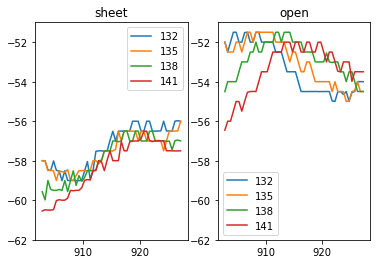

In [14]:
myplot(vinegar, [132, 135, 138, 141], ['sheet', 'open'])

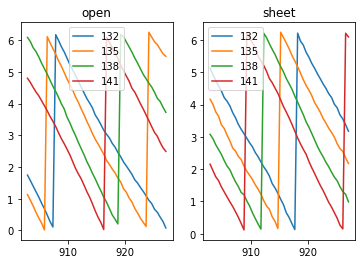

In [15]:
myplot_phase(vinegar, [132, 135, 138, 141], ['open', 'sheet'])

NameError: name 's' is not defined

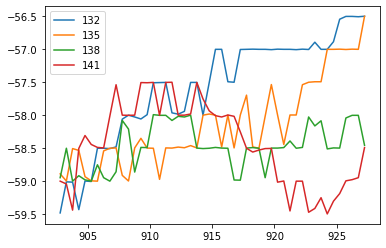

In [16]:
myplot1(empty, [132, 135, 138, 141], 'open')

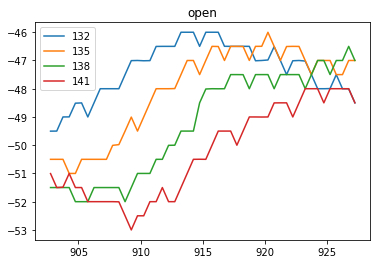

In [69]:
myplot1(oil, [132, 135, 138, 141], 'open')

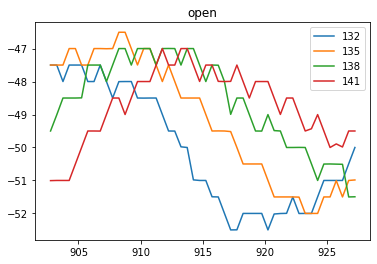

In [70]:
myplot1(water, [132, 135, 138, 141], 'open')

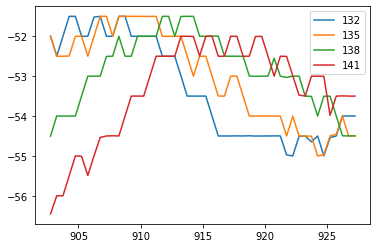

In [29]:
vinegar_open_g = vinegar['open'].groupby('DISTANCE')
dists = [132, 135, 138, 141]
for dist in dists:
    g = vinegar_open_g.get_group(dist)
    plt.plot(g['CHANNEL'], g['RSSI'])
plt.legend(dists)
plt.show()

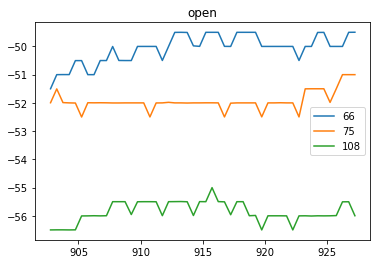

In [19]:
myplot1(empty, [66, 75, 108], 'open')

In [18]:
water90275 = water['open'].groupby('CHANNEL').get_group(902.75)
oil90275 = oil['open'].groupby('CHANNEL').get_group(902.75)
vinegar90275 = vinegar['open'].groupby('CHANNEL').get_group(902.75)

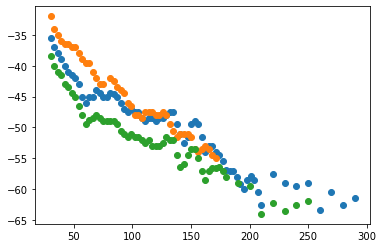

In [20]:
plt.scatter(water90275['DISTANCE'], water90275['RSSI'])
plt.scatter(oil90275['DISTANCE'], oil90275['RSSI'])
plt.scatter(vinegar90275['DISTANCE'], vinegar90275['RSSI'])